In [1]:
import torch, pickle
from torch.utils.data import Dataset, DataLoader
from utils.PreProc_Data.DataProc import StackedSequenceDataset
import numpy as np
from Eval_MZA_Experiment import Eval_MZA_Experiment
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
exp_dir   = "Trained_Models"  #Experiment Directory
exp_name  = "sl64_nhu40_nl1_bs16_2"             #One of the experiment names

eval_mza = Eval_MZA_Experiment(exp_dir, exp_name)

/usr/bin/nvidia-modprobe: unrecognized option: "-s"

ERROR: Invalid commandline, please run `/usr/bin/nvidia-modprobe --help`
       for usage information.

/usr/bin/nvidia-modprobe: unrecognized option: "-s"

ERROR: Invalid commandline, please run `/usr/bin/nvidia-modprobe --help`
       for usage information.



In [8]:
epoch_num = 70
eval_mza.load_weights(epoch_num)

torch.Size([89, 120, 64]) torch.Size([89, 120, 2]) torch.Size([89, 120, 2])


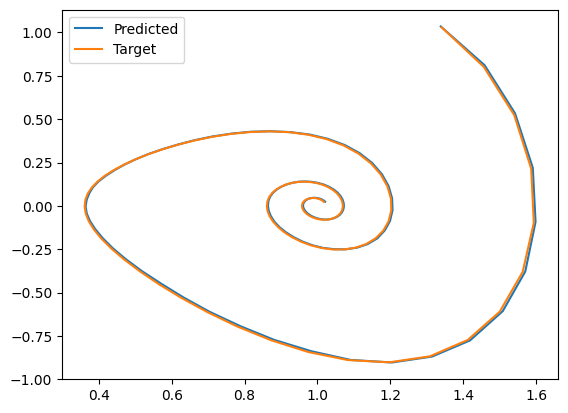

In [9]:
dataset = eval_mza.test_dataset
num_trajs = eval_mza.test_num_trajs
x_nn_hat, Phi_nn_hat, Phi_nn = eval_mza.predict_onestep(dataset, num_trajs)

print(x_nn_hat.shape, Phi_nn_hat.shape, Phi_nn.shape)

#Plotting one step prediction

for i in range (1):
    plt.figure()
    plt.plot(Phi_nn_hat.cpu().numpy()[i,:,0], Phi_nn_hat.cpu().numpy()[i,:,1], label = "Predicted")
    plt.plot(Phi_nn.cpu().numpy()[i,:,0], Phi_nn.cpu().numpy()[i,:,1], label = "Target")
    plt.legend()

In [12]:
#multistep prediction
timesteps = 120
initial_conditions = Phi_nn[:,0].to(eval_mza.device)
x_hat, Phi_hat = eval_mza.predict_multistep(initial_conditions, timesteps)

print(x_hat.shape, Phi_hat.shape)


torch.Size([89, 121, 64]) torch.Size([89, 121, 2])


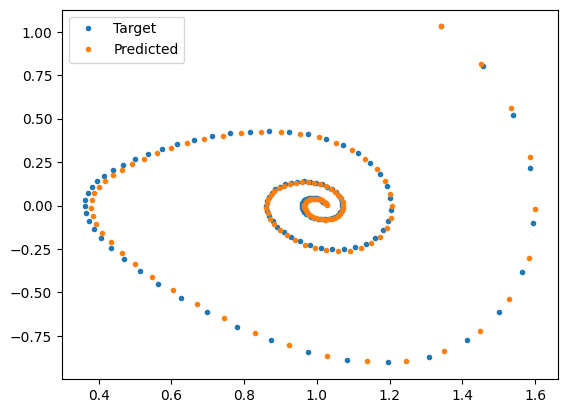

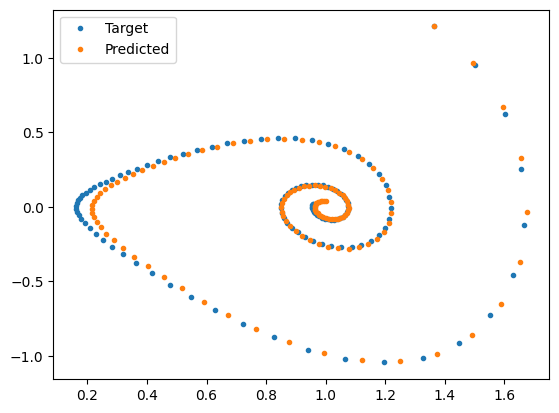

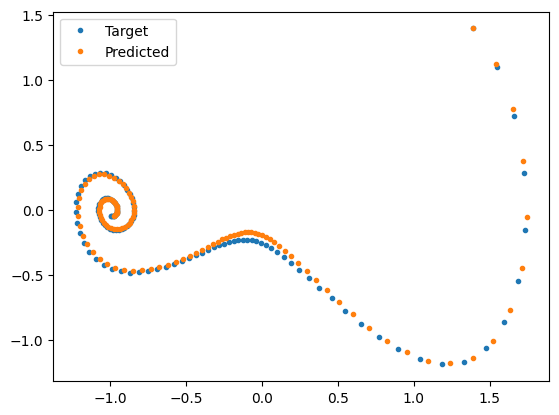

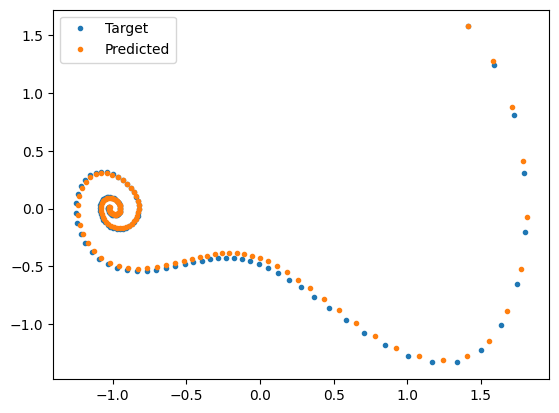

In [13]:
for i in range (4):
    plt.figure()
    plt.plot(Phi_nn.cpu().numpy()[i,:,0], Phi_nn.cpu().numpy()[i,:,1], '.', label = "Target")
    plt.plot(Phi_hat.cpu().numpy()[i,:,0], Phi_hat.cpu().numpy()[i,:,1], '.', label = "Predicted")
    plt.legend()

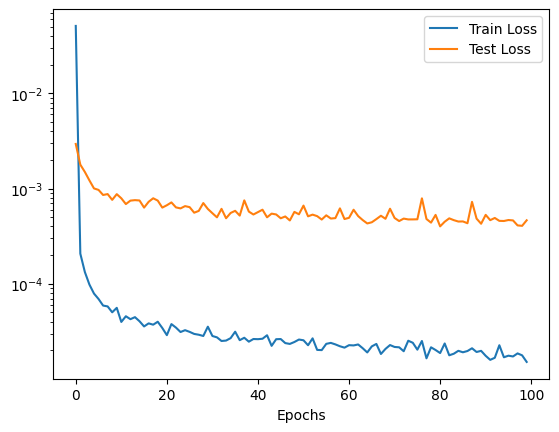

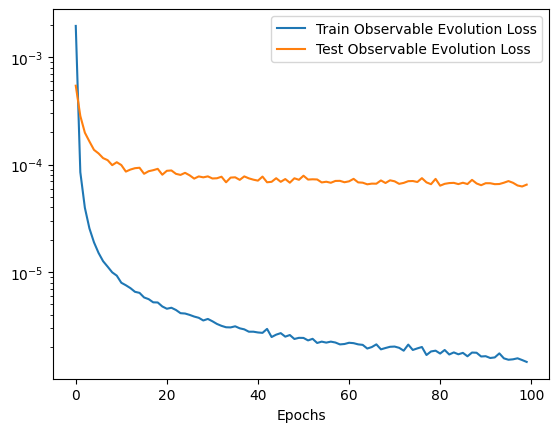

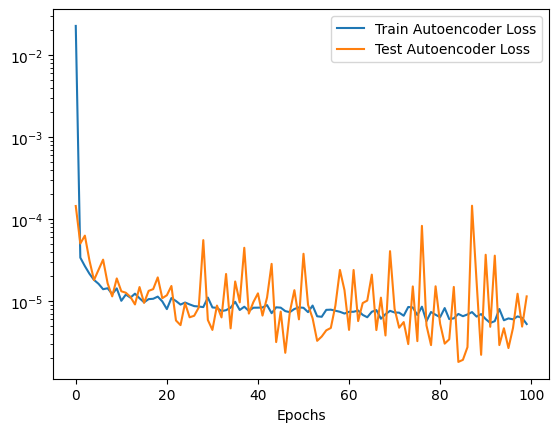

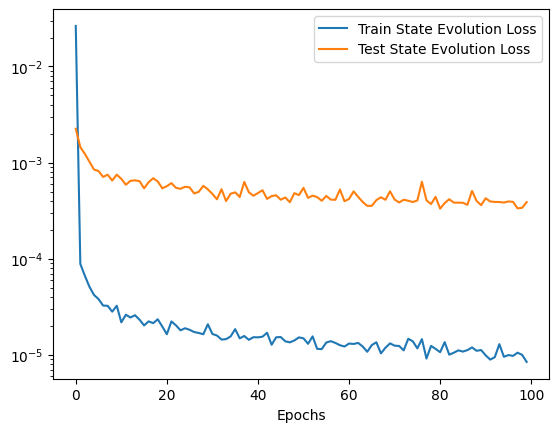

In [9]:
#plot learning curves
eval_mza.plot_learning_curves()

Text(0.5, 0, 'Epochs')

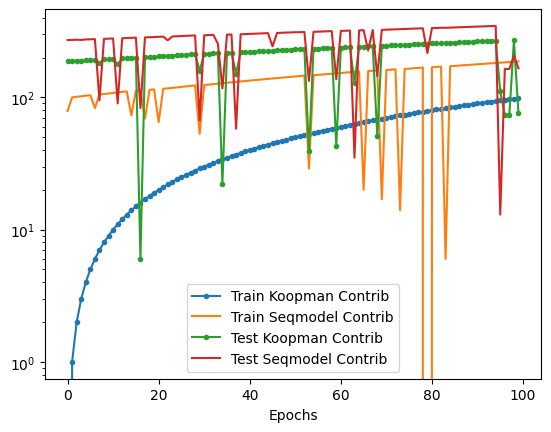

In [15]:
plt.figure()
plt.semilogy(df['epoch'],df['Train_koop_ptg'], '.-',label="Train Koopman Contrib")
plt.semilogy(df['epoch'],df['Train_seqmodel_ptg'], label="Train Seqmodel Contrib")

plt.semilogy(df['epoch'], df['Test_koop_ptg'], '.-',label="Test Koopman Contrib")
plt.semilogy(df['epoch'], df['Test_seqmodel_ptg'], label="Test Seqmodel Contrib")

plt.legend()
# plt.savefig(self.exp_dir+'/'+self.exp_name+"/out_log/")
plt.xlabel("Epochs")

<Figure size 640x480 with 0 Axes>

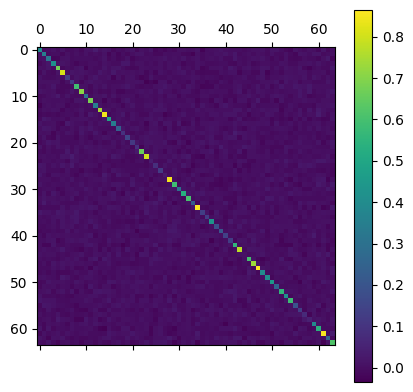

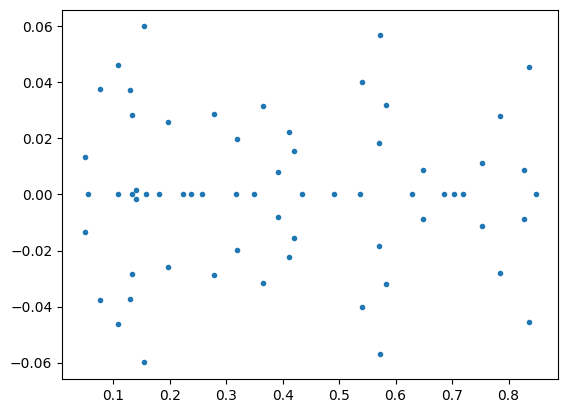

In [29]:
mat = mza.model.koopman.getKoopmanMatrix()
mat = mat.detach().cpu().numpy()
eigval, egivec = np.linalg.eig(mat)

plt.figure()
plt.matshow(mat)
plt.colorbar()

plt.figure()
plt.plot(np.real(eigval), np.imag(eigval), ".")